In [13]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn import preprocessing

In [14]:
df = pd.read_csv('train.csv')

In [15]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [18]:
df.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [19]:
df.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [20]:
df['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [21]:
# Seperating the categorical columns from the binary columns

num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
obj = ['O']

In [22]:
df_num = df.select_dtypes(include=num)  #Data-frame contains the columns with numeric datatype
df_cat = df.select_dtypes(include=obj)  #Data-frame contaiin the columns with categorical datatypes 

In [23]:
print(df_cat.columns)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


In [24]:
print(df_num.columns)

Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)


In [25]:
# Checking for the unique values in each row of df_cat

for col in df_cat.columns:
    print(df_cat[col].nunique())
    print(df_cat[col].unique())
    

47
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
27
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
44
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
7
['a' 'e' 'c' 'f' 'd' 'b' 'g']
4
['d' 'b' 'c' 'a']
29
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
12
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
25
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']


In [26]:
# Checking the unique values in the df_num

for col1 in df_num.columns:
    print(df_num[col1].nunique())
    print(df_num[col1].unique())

4209
[   0    6    7 ... 8412 8415 8417]
2545
[130.81  88.53  76.26 ...  85.71 108.77  87.48]
2
[0 1]
1
[0]
2
[0 1]
2
[1 0]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[1 0]
2
[0 1]
2
[0 1]
2
[1 0]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[1 0]
2
[0 1]
2
[0 1]
2
[0 1]
2
[1 0]
2
[0 1]
2
[1 0]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[1 0]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[1 0]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[1 0]
2
[0 1]
2
[1 0]
2
[0 1]
2
[0 1]
2
[1 0]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[1 0]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
1
[0]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
1
[0]
2
[0 1]
2
[0 1]
2
[0 1]
2
[1 0]
2
[0 1]
2
[0 1]
2
[1 0]
2
[0 1]
2
[1 0]
2
[0 1]
2
[1 0]
2
[1 0]
2
[1 0]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]


We see the columns have only 0 and 1 values

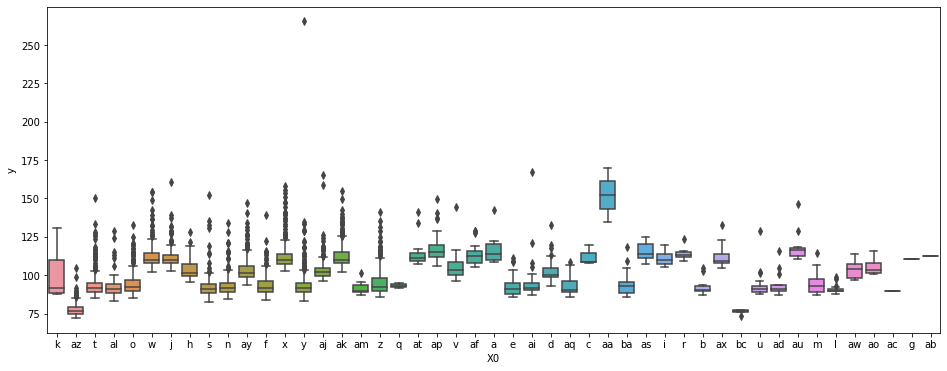

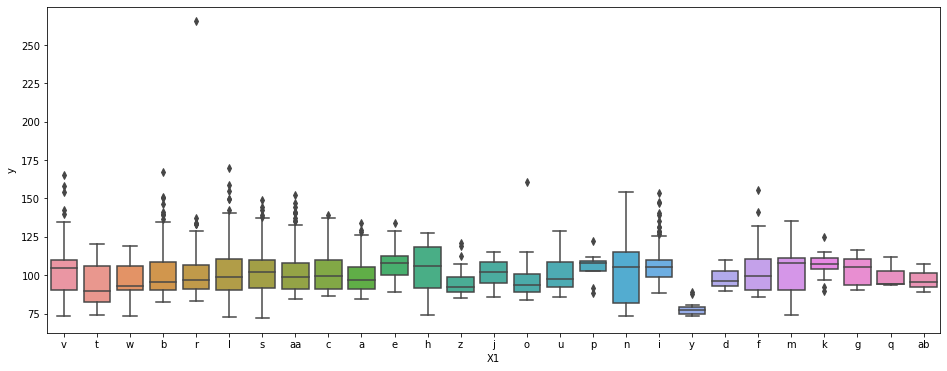

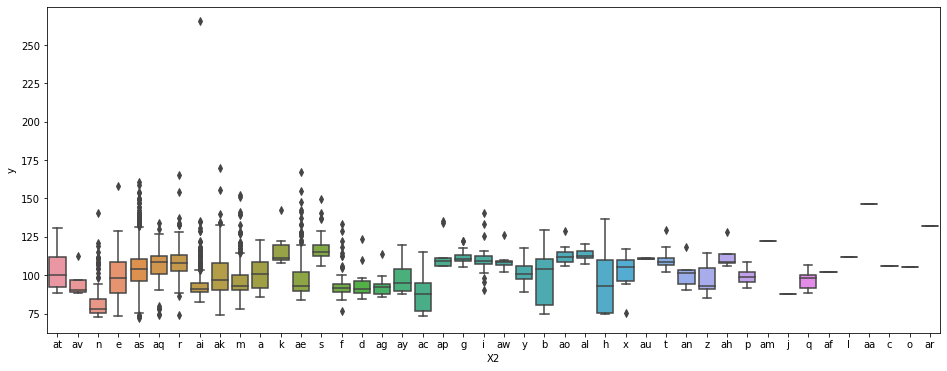

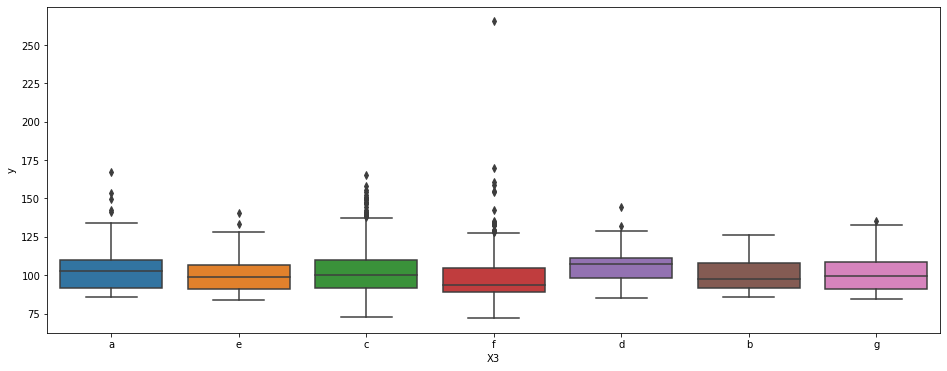

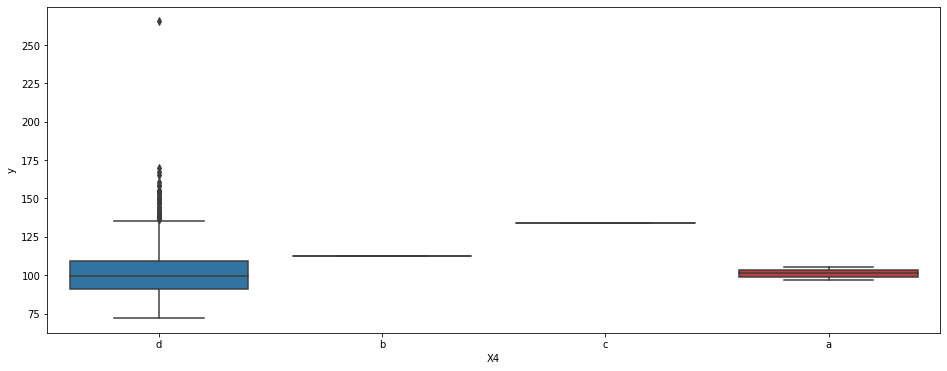

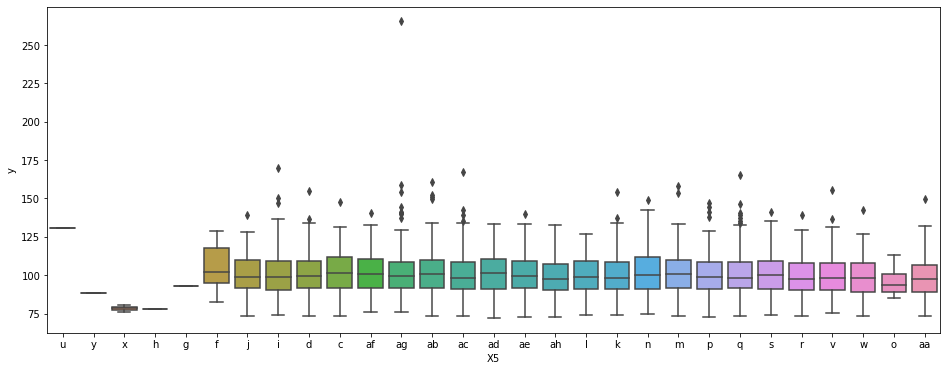

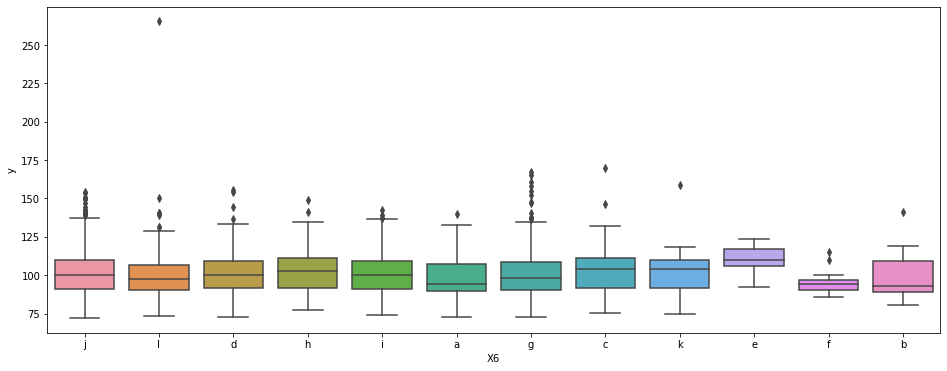

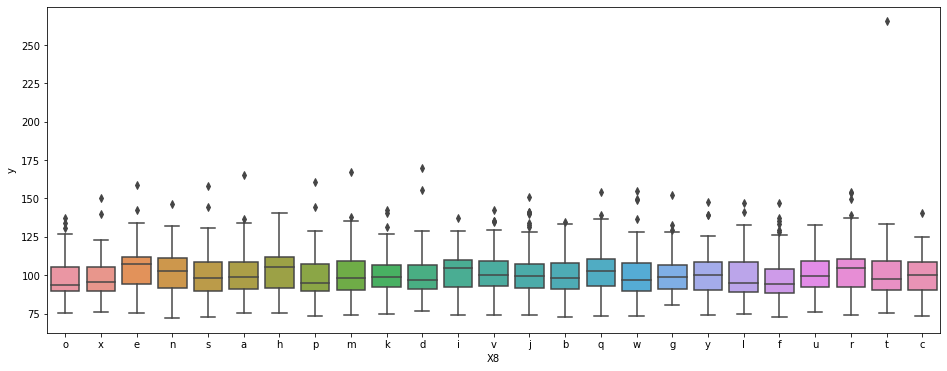

In [27]:
# Checking for variance in the categorical column

column = ['X0','X1','X2','X3','X4','X5','X6','X8']

for i in column:
    plt.figure(figsize=(16,6))
    sns.boxplot(x=i, y='y',data=df)
    
    plt.xlabel(i)
    plt.ylabel('y')
    

From the Box plots we observe that X0 , X1, X2 have high Variance and the other columns has low variance therefore they can be excluded

# LABEL ENCODING

In [28]:
for i in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
    
    label = preprocessing.LabelEncoder()
    label.fit(list(df[i].values))
    df[i]= label.transform(list(df[i].values))
    

In [29]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


# Checking for missing values

In [30]:
missing_df = df.isnull().sum(axis=0).reset_index()

missing_df

,index,0
0,ID,0
1,y,0
2,X0,0
3,X1,0
4,X2,0
...,...,...
373,X380,0
374,X382,0
375,X383,0
376,X384,0


We can see ,there are no missing values

# Checking for unique values

In [31]:
unique_val = {}
for col in df.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(df[col].unique()).tolist())
        tlist = unique_val.get(unique_value, [])
        tlist.append(col)
        unique_val[unique_value] = tlist[:]

   

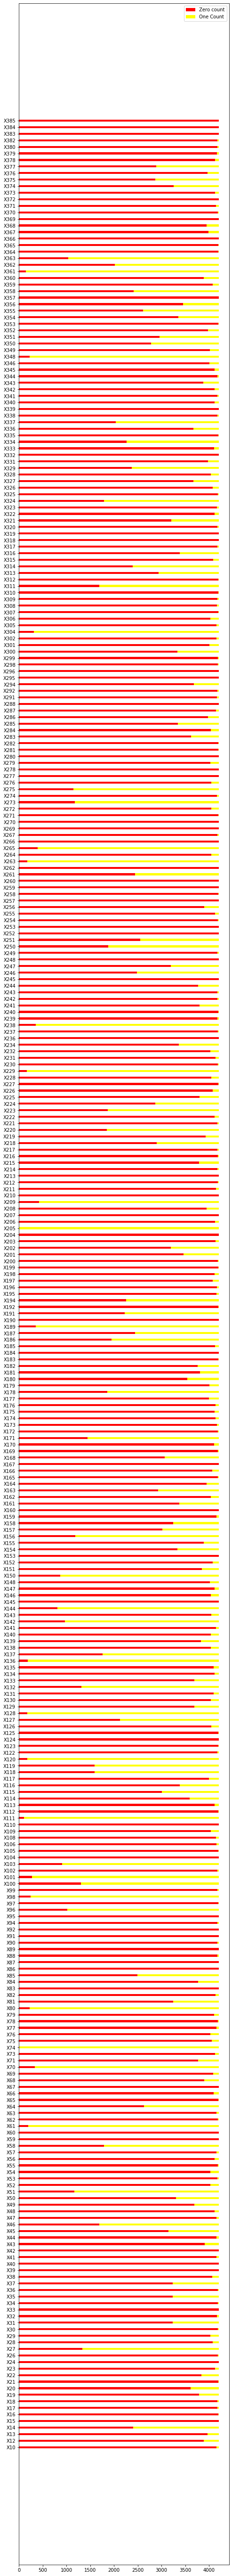

In [32]:
# Checking the binary variables


zero_count_list = []
one_count_list = []
column = unique_val['[0, 1]']
for col in column:
    zero_count_list.append((df[col]==0).sum())
    one_count_list.append((df[col]==1).sum())

N = len(column)
i = np.arange(N)
width = 0.30

plt.figure(figsize=(8,100))
p1 = plt.barh(i, zero_count_list, width, color='red')
p2 = plt.barh(i, one_count_list, width, left=zero_count_list, color="yellow")
plt.yticks(i, column)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()



From the above plot we can see is column 'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347' has only value =0 ,therfore we can drop those columns

# Applying Linear Regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [67]:
#Dropping the useless columns
X = df.drop(['ID','y','X3','X4','X5','X6','X8' ,'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'],axis =1)
y = df['y']



In [35]:
X.head()

,X0,X1,X2,X10,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [38]:
linreg = LinearRegression()

In [39]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = linreg.predict(X_test)

In [41]:
from sklearn import metrics

In [42]:

print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  461029704.43349004
Mean Sq  Error MSE      :  6.811994952914077e+19
Root Mean Sq Error RMSE :  8253481055.2360735
MAPE                    :  389100165.3272641
MPE                     :  197047137.88371634
r2 value                :  -4.410937645740642e+17


Not a good model

# Applying Random Forest Regressor

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [44]:

rf_reg = RandomForestRegressor(criterion= 'mse', 
                               max_depth= 4, 
                               max_features= 'auto', 
                               min_samples_split= 0.05, 
                               n_estimators=20)



In [45]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=0.05,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [46]:
y_pred = rf_reg.predict(X_test)

In [47]:
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Sq  Error MSE      :  67.12724743405558
r2 value                :  0.5653342305616981


Better fit than Linear Regression.

# Applying KNN Regressor

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
knn = KNeighborsRegressor(n_neighbors=17, 
                          metric='hamming', 
                          weights= 'uniform', 
                          algorithm='brute')



In [50]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='hamming',
                    metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                    weights='uniform')

In [51]:
y_pred = knn.predict(X_test)

In [52]:
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Sq  Error MSE      :  84.12556373091218
r2 value                :  0.45526586764264354


RandomForestRegressor was better fit  

# Applying XGBoost

In [56]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error 



In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
dtr = xgb.Dmatrix(X_train,y_train)
dte = xgb.Dmatrix(X_test,y_test)

In [62]:
xgb_params = {
    'max_depth':8,
    'min_child_weight': 1,
    'eta':.35,
    'subsample': 1,
    'colsample_bytree': .9,
    'objective':'reg:squarederror',
    'reg_alpha':  10,
    'reg_lambda': 45,
    'eval_metric': 'mae',
    'validate_parameters': 1,
    'verbose_eval':False
}



In [63]:
%%time
model = xgb.train(
               xgb_params,
               dtrain,
               num_boost_round=999,
               evals=[(dtest, "Test")],
               early_stopping_rounds=10
)



In [66]:
y_pred = model.predict(dtr)

print('Mean Abs Error MAE      : ', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Sq  Error MSE : ', np.sqrt(metrics.mean_squared_error(y_train, y_pred))
print('r2 value                : ', metrics.r2_score(y_train, y_pred))
      
y_pred = model.predict(dte)
      
print('Mean Abs Error MAE      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq  Error MSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))      
      


The XGBoost improved the performance of our model